In [1]:
#Question 1
#reading the file
f = open("numbers.txt", "r")

f1 = list(f.read().split(","))
print(f1)

['2', '4', '6', '8', '4', '5', '2', '1', '9', '0', '4', '6', '7', '4', '3', '2', '1', '9', '10', '3', '7', '9', '6', '0', '1', '3', '5', '6', '7', '8', '9', '10', '2', '3', '6', '8', '9', '10', '6', '7', '4', '3', '2', '1', '9', '10', '3', '7', '9', '6', '0', '1', '3', '5', '6', '7', '8', '9', '10', '2', '3', '6', '8', '9', '10', '2', '4', '6', '8', '4', '5', '2', '1', '9', '0', '4', '6', '7', '4', '3', '2', '1', '9', '10', '3', '7', '9', '6', '4', '5', '2', '1', '9', '0', '4', '6', '7', '4', '3', '2', '1', '9', '10', '3', '7', '9', '6', '0', '1', '3', '5', '6', '7', '8', '9', '10', '2', '3', '6', '8', '9', '10', '6', '7', '4', '3', '6', '8', '4', '5', '2', '10', '3', '7', '9', '6', '0', '1', '3', '5', '6', '7', '8', '9', '10', '2', '3', '6', '8', '9', '10', '2', '4', '6', '8', '4', '5', '2', '1', '9', '0', '4', '6', '7', '4', '2', '4', '6', '8', '4', '5', '2', '1', '9', '0', '4', '6', '7', '4', '3', '2', '1', '9', '10', '3', '7', '9', '6']


In [2]:
#finding the frequency of each distinct element using a dictionary
dict1 = {'0':f1.count('0'),
        '1':f1.count('1'),
        '2':f1.count('2'),
        '3':f1.count('3'),
        '4':f1.count('4'),
        '5':f1.count('5'),
        '6':f1.count('6'),
        '7':f1.count('7'),
        '8':f1.count('8'),
        '9':f1.count('9'),
        '10':f1.count('10')}

print(dict1)
print(" ")
for key, value in dict1.items():
    print(key, value)

{'0': 9, '1': 14, '2': 19, '3': 20, '4': 22, '5': 10, '6': 26, '7': 17, '8': 13, '9': 24, '10': 14}
 
0 9
1 14
2 19
3 20
4 22
5 10
6 26
7 17
8 13
9 24
10 14


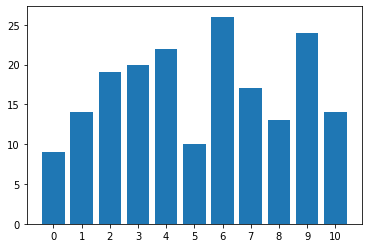

In [3]:
#plot the frequency results
import matplotlib.pyplot as plt
import numpy as np

plt.bar(list(dict1.keys()), dict1.values())
plt.show()

In [4]:
#store dictionary results into json file and store it in local computer
import json

with open("./midterm.json", "w") as out:
    json.dump(dict1, out)

print (json.load(open("midterm.json", "r")))

{'0': 9, '1': 14, '2': 19, '3': 20, '4': 22, '5': 10, '6': 26, '7': 17, '8': 13, '9': 24, '10': 14}


In [5]:
#Question 2
import pandas as pd

df = pd.read_csv('Netflix-sample.csv')
#dropping unrequired columns
df = df.drop(
['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country']
    , axis=1)

In [6]:
print(df.dtypes)

print(" ")

#convert start time to datetime format
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
print(df.dtypes)

print(" ")

#change the Start Time column into the dataframe's index
df = df.set_index('Start Time')

#convert from UTC timezone to eastern time
df.index = df.index.tz_convert('US/Eastern')

#reset the index so that Start Time becomes a column again
df = df.reset_index()

#double-check that it worked
print(df.head())

print(" ")

#convert duration to datetime format
df['Duration'] = pd.to_timedelta(df['Duration'])
print(df.dtypes)

print(" ")

#convert such that start time has only the date
df['Start Time'] = pd.to_datetime(df['Start Time']).dt.date
print(df.head())

Start Time    object
Duration      object
Title         object
dtype: object
 
Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object
 
                 Start Time Duration  \
0 2013-03-20 01:17:53-04:00  0:00:05   
1 2013-03-20 00:27:45-04:00  0:44:31   
2 2013-03-20 00:05:21-04:00  0:22:06   
3 2013-03-19 20:20:03-04:00  0:48:14   
4 2013-03-19 20:10:31-04:00  0:04:51   

                                               Title  
0  Star Trek: Deep Space Nine: Season 5: Empok No...  
1  Star Trek: Deep Space Nine: Season 5: Blaze of...  
2  Star Trek: Deep Space Nine: Season 5: Children...  
3                                  The Invisible War  
4                                  The Invisible War  
 
Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object
 
   Start Time        Duration  \
0  2013-03-20 0 days 00:00:05   
1  2013-03-20 0 days 00:4

In [7]:
#Removing data with short watch durations
df = df[(df['Duration'] > '0 days 00:01:00')]
df

,Start Time,Duration,Title
1,2013-03-20,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...
2,2013-03-20,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...
3,2013-03-19,0 days 00:48:14,The Invisible War
4,2013-03-19,0 days 00:04:51,The Invisible War
5,2013-03-19,0 days 00:22:29,Star Trek: Deep Space Nine: Season 5: Children...
...,...,...,...
195,2013-03-01,0 days 00:05:18,Star Trek: Deep Space Nine: Season 4: Body Par...
196,2013-03-01,0 days 00:58:12,Louis C.K.: Live at the Beacon Theater
197,2013-03-01,0 days 00:21:59,Star Trek: Deep Space Nine: Season 4: Body Par...
198,2013-03-01,0 days 00:44:26,Star Trek: Deep Space Nine: Season 4: The Quic...


In [8]:
print(df['Title'].unique())
#Star Trek: Deep Space Nine
#The Invisible War
#The Office (U.S.)
#Archer
#30 for 30
#Buffy the Vampire Slayer
#Louis C.K.

['Star Trek: Deep Space Nine: Season 5: Blaze of Glory (Episode 23)'
 'Star Trek: Deep Space Nine: Season 5: Children of Time (Episode 22)'
 'The Invisible War'
 'Star Trek: Deep Space Nine: Season 5: Soldiers of the Empire (Episode 21)'
 'Star Trek: Deep Space Nine: Season 5: Ferengi Love Songs (Episode 20)'
 'The Office (U.S.): Season 5: Moroccan Christmas (Episode 11)'
 'The Office (U.S.): Season 5: The Surplus (Episode 10)'
 'The Office (U.S.): Season 5: Frame Toby (Episode 9)'
 'The Office (U.S.): Season 5: Business Trip (Episode 8)'
 'The Office (U.S.): Season 5: Customer Survey (Episode 7)'
 'The Office (U.S.): Season 5: Employee Transfer (Episode 6)'
 'The Office (U.S.): Season 5: Crime Aid (Episode 5)'
 'The Office (U.S.): Season 5: Baby Shower (Episode 4)'
 'The Office (U.S.): Season 5: Business Ethics (Episode 3)'
 'The Office (U.S.): Season 5: Weight Loss: Part 2 (Episode 2)'
 'The Office (U.S.): Season 5: Weight Loss: Part 1 (Episode 1)'
 'The Office (U.S.): Season 4: Good

In [9]:
#creating a 'Show' only column as the titles for the same shows are different
def func(dataframe):
    if 'The Office (U.S.)' in dataframe['Title']:
        val = 'The Office (U.S.)'
    elif 'Star Trek' in dataframe['Title']:
        val = 'Star Trek'
    elif 'Archer' in dataframe['Title']:
        val = 'Archer'
    elif '30 for 30' in dataframe['Title']:
        val = '30 for 30'
    elif 'Buffy the Vampire Slayer' in dataframe['Title']:
        val = 'Buffy the Vampire Slayer'
    elif 'The Invisible War' in dataframe['Title']:
        val = 'The Invisible War'
    else:
        val = 'Louis C.K.'
    return val

df['Show'] = df.apply(func, axis=1)
df

,Start Time,Duration,Title,Show
1,2013-03-20,0 days 00:44:31,Star Trek: Deep Space Nine: Season 5: Blaze of...,Star Trek
2,2013-03-20,0 days 00:22:06,Star Trek: Deep Space Nine: Season 5: Children...,Star Trek
3,2013-03-19,0 days 00:48:14,The Invisible War,The Invisible War
4,2013-03-19,0 days 00:04:51,The Invisible War,The Invisible War
5,2013-03-19,0 days 00:22:29,Star Trek: Deep Space Nine: Season 5: Children...,Star Trek
...,...,...,...,...
195,2013-03-01,0 days 00:05:18,Star Trek: Deep Space Nine: Season 4: Body Par...,Star Trek
196,2013-03-01,0 days 00:58:12,Louis C.K.: Live at the Beacon Theater,Louis C.K.
197,2013-03-01,0 days 00:21:59,Star Trek: Deep Space Nine: Season 4: Body Par...,Star Trek
198,2013-03-01,0 days 00:44:26,Star Trek: Deep Space Nine: Season 4: The Quic...,Star Trek


In [10]:
print('Mean is', df['Duration'].mean())
print('Median is', df['Duration'].median())
print('Minimum is', df['Duration'].min())
print('Maximum is', df['Duration'].max())
print('Standard Deviation is', df['Duration'].std())

Mean is 0 days 00:21:17.320652173
Median is 0 days 00:20:59
Minimum is 0 days 00:01:02
Maximum is 0 days 00:58:12
Standard Deviation is 0 days 00:11:36.579394544


In [11]:
df.groupby('Start Time').mean()

/var/folders/bc/qy79xgtd0579t6yq5xvf7_hc0000gn/T/ipykernel_59143/4139009783.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df.groupby('Start Time').mean()


,Duration
Start Time,
2013-03-01,0 days 00:34:44.600000
2013-03-02,0 days 00:29:15.500000
2013-03-03,0 days 00:31:17.857142857
2013-03-04,0 days 00:27:25.875000
2013-03-05,0 days 00:32:31.666666666
2013-03-06,0 days 00:39:25.375000
2013-03-07,0 days 00:25:54.333333333
2013-03-08,0 days 00:19:39.833333333
2013-03-09,0 days 00:18:03.857142857


In [12]:
df.groupby('Start Time').median()

/var/folders/bc/qy79xgtd0579t6yq5xvf7_hc0000gn/T/ipykernel_59143/3483831586.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.median is deprecated. In a future version, a TypeError will be raised. Before calling .median, select only columns which should be valid for the function.
  df.groupby('Start Time').median()


,Duration
Start Time,
2013-03-01,0 days 00:43:48
2013-03-02,0 days 00:30:36.500000
2013-03-03,0 days 00:35:32
2013-03-04,0 days 00:29:02.500000
2013-03-05,0 days 00:29:22
2013-03-06,0 days 00:44:18.500000
2013-03-07,0 days 00:19:55
2013-03-08,0 days 00:21:27.500000
2013-03-09,0 days 00:21:31


In [13]:
df.groupby('Start Time').min()

,Duration,Title,Show
Start Time,,,
2013-03-01,0 days 00:05:18,Louis C.K.: Live at the Beacon Theater,Louis C.K.
2013-03-02,0 days 00:11:30,Star Trek: Deep Space Nine: Season 4: Body Par...,Star Trek
2013-03-03,0 days 00:07:27,Star Trek: Deep Space Nine: Season 5: ...Nor t...,Star Trek
2013-03-04,0 days 00:01:19,Archer: Season 2: Blood Test (Episode 3),Archer
2013-03-05,0 days 00:23:29,30 for 30: The Two Escobars,30 for 30
2013-03-06,0 days 00:13:24,"Buffy the Vampire Slayer: Season 6: Once More,...",Buffy the Vampire Slayer
2013-03-07,0 days 00:12:58,Archer: Season 2: The Double Deuce (Episode 5),Archer
2013-03-08,0 days 00:10:44,The Office (U.S.): Season 5: The Duel (Episode...,The Office (U.S.)
2013-03-09,0 days 00:02:40,The Office (U.S.): Season 7: China (Episode 10),The Office (U.S.)


In [14]:
df.groupby('Start Time').max()

,Duration,Title,Show
Start Time,,,
2013-03-01,0 days 00:58:12,Star Trek: Deep Space Nine: Season 4: To the D...,Star Trek
2013-03-02,0 days 00:44:19,Star Trek: Deep Space Nine: Season 5: The Ship...,Star Trek
2013-03-03,0 days 00:44:51,Star Trek: Deep Space Nine: Season 5: Trials a...,Star Trek
2013-03-04,0 days 00:44:50,Star Trek: Deep Space Nine: Season 5: Things P...,Star Trek
2013-03-05,0 days 00:44:44,Star Trek: Deep Space Nine: Season 5: The Dark...,Star Trek
2013-03-06,0 days 00:50:01,Star Trek: Deep Space Nine: Season 5: In Purga...,Star Trek
2013-03-07,0 days 00:44:50,Star Trek: Deep Space Nine: Season 5: Ties of ...,Star Trek
2013-03-08,0 days 00:21:48,The Office (U.S.): Season 7: The Sting (Episod...,The Office (U.S.)
2013-03-09,0 days 00:35:37,The Office (U.S.): Season 7: WUPHF.com (Episod...,The Office (U.S.)


In [15]:
#Duration for each show
catdf = df.groupby('Show').sum()
catdf = catdf.reset_index()
catdf

/var/folders/bc/qy79xgtd0579t6yq5xvf7_hc0000gn/T/ipykernel_59143/13192303.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  catdf = df.groupby('Show').sum()


,Show,Duration,Title
0,30 for 30,0 days 00:23:29,30 for 30: The Two Escobars
1,Archer,0 days 03:13:55,Archer: Season 3: The Man from Jupiter (Episod...
2,Buffy the Vampire Slayer,0 days 00:50:01,"Buffy the Vampire Slayer: Season 6: Once More,..."
3,Louis C.K.,0 days 00:58:12,Louis C.K.: Live at the Beacon Theater
4,Star Trek,0 days 20:00:57,Star Trek: Deep Space Nine: Season 5: Blaze of...
5,The Invisible War,0 days 00:53:05,The Invisible WarThe Invisible War
6,The Office (U.S.),1 days 14:57:28,The Office (U.S.): Season 5: Moroccan Christma...


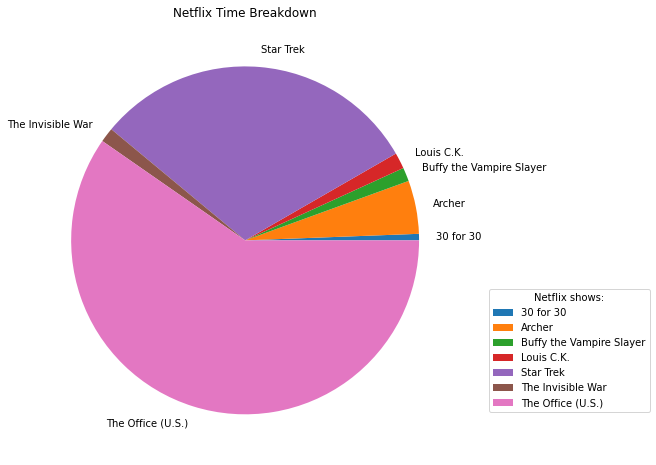

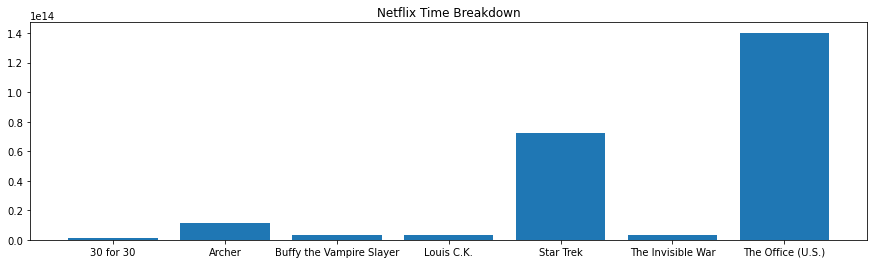

In [16]:
#pie chart
import matplotlib.pyplot as plt
import numpy as np

y = np.array(catdf['Duration'])
mylabels = catdf['Show']

plt.figure(figsize=(20,8))
plt.pie(y, labels = mylabels)
plt.legend(title = "Netflix shows:", bbox_to_anchor = (1.05,0.4), loc='upper left')
plt.title("Netflix Time Breakdown")
plt.show()

#bar chart
import matplotlib.pyplot as plt
import numpy as np

x = np.array(catdf['Show'])
y = np.array(catdf['Duration'])

plt.figure(figsize=(15,4))
plt.bar(x, y)
plt.title("Netflix Time Breakdown")
plt.show()

In [17]:
#Duration spent on netflix everyday
daily_df = df.groupby('Start Time').sum()
daily_df = daily_df.reset_index()
daily_df

,Start Time,Duration,Title,Show
0,2013-03-01,0 days 02:53:43,Star Trek: Deep Space Nine: Season 4: Body Par...,Star TrekLouis C.K.Star TrekStar TrekStar Trek
1,2013-03-02,0 days 01:57:02,Star Trek: Deep Space Nine: Season 5: The Ship...,Star TrekStar TrekStar TrekStar Trek
2,2013-03-03,0 days 03:39:05,Star Trek: Deep Space Nine: Season 5: Let He W...,Star TrekStar TrekStar TrekStar TrekStar TrekS...
3,2013-03-04,0 days 03:39:27,Star Trek: Deep Space Nine: Season 5: The Dark...,Star TrekStar TrekStar TrekArcherArcherStar Tr...
4,2013-03-05,0 days 01:37:35,Star Trek: Deep Space Nine: Season 5: The Bego...,Star Trek30 for 30Star Trek
5,2013-03-06,0 days 05:15:23,Star Trek: Deep Space Nine: Season 5: Business...,Star TrekStar TrekStar TrekStar TrekBuffy the ...
6,2013-03-07,0 days 01:17:43,Archer: Season 2: The Double Deuce (Episode 5)...,ArcherStar TrekStar Trek
7,2013-03-08,0 days 01:57:59,The Office (U.S.): Season 7: The Sting (Episod...,The Office (U.S.)The Office (U.S.)The Office (...
8,2013-03-09,0 days 06:19:21,The Office (U.S.): Season 7: Dwight K. Schrute...,The Office (U.S.)The Office (U.S.)The Office (...
9,2013-03-10,0 days 04:15:30,The Office (U.S.): Season 2: The Fire (Episode...,The Office (U.S.)The Office (U.S.)The Office (...


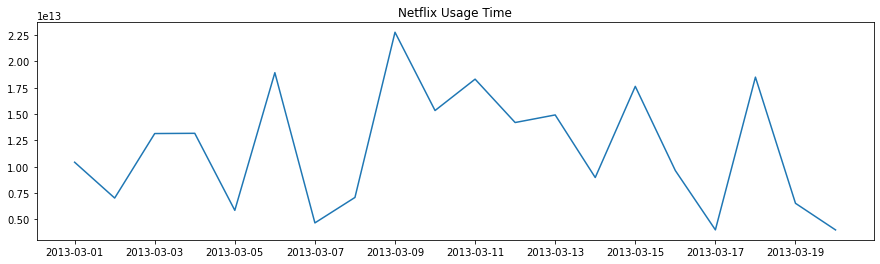

In [18]:
#time series
import matplotlib.pyplot as plt
import numpy as np

x1 = np.array(daily_df['Start Time'])
y1 = np.array(daily_df['Duration'])

plt.figure(figsize=(15,4))
plt.plot(x1,y1)
plt.title("Netflix Usage Time")

plt.show()

In [19]:
#Star Trek: Deep Space Nine
startrek0 = df[df['Show'].str.contains('Star Trek', regex=False)]
startrek = startrek0.groupby('Start Time').sum()
startrek = startrek.reset_index()

#The Invisible War
invisiblewar0 = df[df['Show'].str.contains('The Invisible War', regex=False)]
invisiblewar = invisiblewar0.groupby('Start Time').sum()
invisiblewar = invisiblewar.reset_index()

#The Office (U.S.)
office0 = df[df['Show'].str.contains('The Office (U.S.)', regex=False)]
office = office0.groupby('Start Time').sum()
office = office.reset_index()

#Archer
archer0 = df[df['Show'].str.contains('Archer', regex=False)]
archer = archer0.groupby('Start Time').sum()
archer = archer.reset_index()

#30 for 30
thirty0 = df[df['Show'].str.contains('30 for 30', regex=False)]
thirty = thirty0.groupby('Start Time').sum()
thirty = thirty.reset_index()

#Buffy the Vampire Slayer
buffy0 = df[df['Show'].str.contains('Buffy the Vampire Slayer', regex=False)]
buffy = buffy0.groupby('Start Time').sum()
buffy = buffy.reset_index()

#Louis C.K.
louis0 = df[df['Show'].str.contains('Louis C.K.', regex=False)]
louis = louis0.groupby('Start Time').sum()
louis = louis.reset_index()

In [20]:
startrek

,Start Time,Duration,Title,Show
0,2013-03-01,0 days 01:55:31,Star Trek: Deep Space Nine: Season 4: Body Par...,Star TrekStar TrekStar TrekStar Trek
1,2013-03-02,0 days 01:57:02,Star Trek: Deep Space Nine: Season 5: The Ship...,Star TrekStar TrekStar TrekStar Trek
2,2013-03-03,0 days 03:39:05,Star Trek: Deep Space Nine: Season 5: Let He W...,Star TrekStar TrekStar TrekStar TrekStar TrekS...
3,2013-03-04,0 days 03:06:39,Star Trek: Deep Space Nine: Season 5: The Dark...,Star TrekStar TrekStar TrekStar TrekStar TrekS...
4,2013-03-05,0 days 01:14:06,Star Trek: Deep Space Nine: Season 5: The Bego...,Star TrekStar Trek
5,2013-03-06,0 days 04:25:22,Star Trek: Deep Space Nine: Season 5: Business...,Star TrekStar TrekStar TrekStar TrekStar TrekS...
6,2013-03-07,0 days 00:57:48,Star Trek: Deep Space Nine: Season 5: Ferengi ...,Star TrekStar Trek
7,2013-03-18,0 days 00:43:08,Star Trek: Deep Space Nine: Season 5: Soldiers...,Star TrekStar Trek
8,2013-03-19,0 days 00:55:39,Star Trek: Deep Space Nine: Season 5: Children...,Star TrekStar Trek
9,2013-03-20,0 days 01:06:37,Star Trek: Deep Space Nine: Season 5: Blaze of...,Star TrekStar Trek


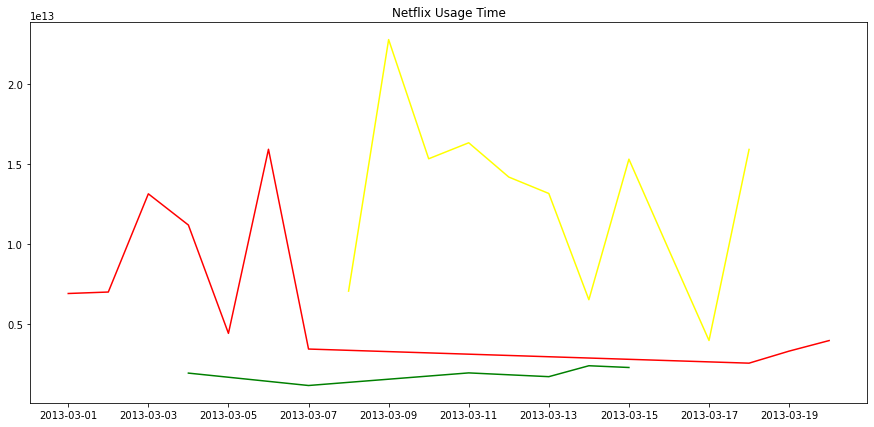

In [21]:
#multiple line comparisons
import matplotlib.pyplot as plt
import numpy as np

x1 = np.array(startrek['Start Time'])
y1 = np.array(startrek['Duration'])

x2 = np.array(invisiblewar['Start Time'])
y2 = np.array(invisiblewar['Duration'])

x3 = np.array(office['Start Time'])
y3 = np.array(office['Duration'])

x4 = np.array(archer['Start Time'])
y4 = np.array(archer['Duration'])

x5 = np.array(thirty['Start Time'])
y5 = np.array(thirty['Duration'])

x6 = np.array(buffy['Start Time'])
y6 = np.array(buffy['Duration'])

x7 = np.array(louis['Start Time'])
y7 = np.array(louis['Duration'])

plt.figure(figsize=(15,7))
plt.plot(x1,y1, color = 'red') #startrek
plt.plot(x2,y2, color = 'orange') #invisiblewar
plt.plot(x3,y3, color = 'yellow') #office
plt.plot(x4,y4, color = 'green') #archer
plt.plot(x5,y5, color = 'blue') #thirty
plt.plot(x6,y6, color = 'indigo') #buffy
plt.plot(x7,y7, color = 'violet') #louis

plt.title("Netflix Usage Time")

plt.show()